In [30]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("../Datasets/Lung_Cancer_Clean_Data.csv")
df.head()

,Cancer_Level,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
0,0,33,1,2,4,5,4,3,2,2,...,4,3,4,2,2,3,1,2,3,4
1,1,17,1,3,1,5,3,4,2,2,...,3,1,3,7,8,6,2,1,7,2
2,2,35,1,4,5,6,5,5,4,6,...,8,8,7,9,2,1,4,6,7,2
3,2,37,1,7,7,7,7,6,7,7,...,8,4,2,3,1,4,5,6,7,5
4,2,46,1,6,8,7,7,7,6,7,...,9,3,2,4,1,4,2,4,2,3


In [23]:
cancer_level = df["Cancer_Level"]
df_unsuper = df.drop(columns="Cancer_Level")
df_unsuper.head()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
0,33,1,2,4,5,4,3,2,2,4,...,4,3,4,2,2,3,1,2,3,4
1,17,1,3,1,5,3,4,2,2,2,...,3,1,3,7,8,6,2,1,7,2
2,35,1,4,5,6,5,5,4,6,7,...,8,8,7,9,2,1,4,6,7,2
3,37,1,7,7,7,7,6,7,7,7,...,8,4,2,3,1,4,5,6,7,5
4,46,1,6,8,7,7,7,6,7,7,...,9,3,2,4,1,4,2,4,2,3


## PCA

In [4]:
scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(df_unsuper)

In [5]:
scaled_df[0]

array([0.3220339 , 0.        , 0.14285714, 0.42857143, 0.57142857,
       0.42857143, 0.33333333, 0.16666667, 0.16666667, 0.5       ,
       0.28571429, 0.14285714, 0.125     , 0.375     , 0.25      ,
       0.42857143, 0.125     , 0.14285714, 0.28571429, 0.        ,
       0.16666667, 0.33333333, 0.5       ])

In [6]:
pca = PCA().fit(scaled_df)

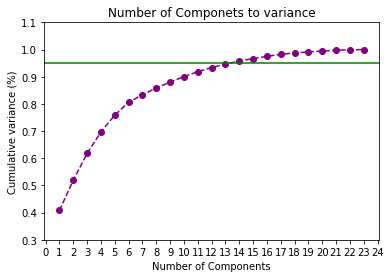

In [7]:
fig, ax = plt.subplots()
xi = np.arange(1, 24, step=1)
yi = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.3,1.1)
plt.plot(xi, yi, marker='o', linestyle='--', color='purple')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 25, step=1))
plt.ylabel('Cumulative variance (%)')
plt.title('Number of Componets to variance')

plt.axhline(y=0.95, color='g', linestyle='-')

plt.show()

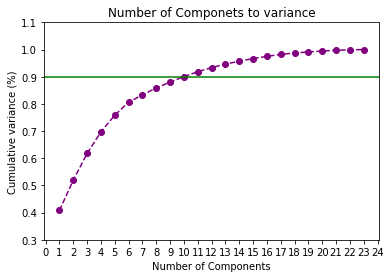

In [8]:
fig, ax = plt.subplots()
xi = np.arange(1, 24, step=1)
yi = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.3,1.1)
plt.plot(xi, yi, marker='o', linestyle='--', color='purple')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 25, step=1))
plt.ylabel('Cumulative variance (%)')
plt.title('Number of Componets to variance')

plt.axhline(y=0.90, color='g', linestyle='-')

plt.show()

In [39]:
pca = PCA(n_components = 11)

In [40]:
data_pca = pca.fit_transform(scaled_df)
df_pca = pd.DataFrame(
    data=data_pca, columns=["PC_1", "PC_2", "PC_3", "PC_4", 
                            "PC_5", "PC_6", "PC_7", "PC_8",
                            "PC_9", "PC_10", "PC_11"])
df_pca.head()

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,PC_11
0,0.747648,-0.270024,-0.461450,0.109905,-0.096856,-0.294522,-0.098225,0.172990,-0.115143,-0.156040,0.036153
1,0.791299,0.180413,-0.626221,-0.195945,0.325441,0.261472,0.985457,-0.071273,-0.122996,-0.225205,-0.059542
2,-0.541883,0.874461,-0.359816,-0.206355,-0.671252,-0.671178,0.107637,0.125065,-0.027972,0.121942,-0.093560
3,-1.310822,-0.319857,-0.174510,-0.234269,-0.660101,0.320634,-0.203363,-0.165634,-0.284719,0.031540,0.222959
4,-1.251190,-0.798545,-0.001247,0.168566,-0.254180,-0.204773,-0.182281,-0.014233,-0.233312,0.031940,-0.243055


In [54]:
labels = {str(i): f"PC_{i+1} ({var:.1f}%)" 
           for i, var in enumerate(pca.explained_variance_ratio_ * 100)}

fig = px.scatter_matrix(data_pca, labels=labels, dimensions=range(10), color=cancer_level)
fig.update_traces(diagonal_visible=False)
fig.show()

In [17]:
tsne = TSNE(n_components=3, learning_rate=10, perplexity=20, random_state=42)
tsne_features = tsne.fit_transform(df_pca)

C:\Users\cabon\miniconda3\envs\ai_env\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


In [25]:
df_tsne = pd.DataFrame({"1": tsne_features[:,0], "2": tsne_features[:,1], "3": tsne_features[:,2], "Cancer_Level": cancer_level})
df_tsne.head()

,1,2,3,Cancer_Level
0,-8.976750,-0.743303,-10.926700,0
1,-0.505683,-11.002240,-0.646964,1
2,0.439252,3.117749,-26.800648,2
3,-16.389477,-18.212885,4.611798,2
4,4.808991,-23.307438,3.013778,2


C:\Users\cabon\miniconda3\envs\ai_env\lib\site-packages\matplotlib\collections.py:982: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


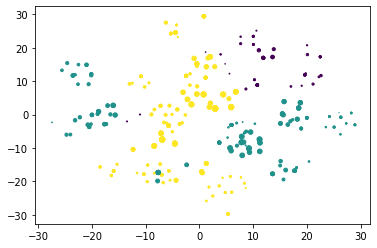

In [27]:
plt.scatter(df_tsne["1"], df_tsne["2"], df_tsne["3"], c=df_tsne["Cancer_Level"])
plt.show()